# Applications
## First passage times
Suppose $N=2$. We start at $S_0=2$ (unemployed). How long does it take to find a job?

Suppose you're tossing coins. How many tosses until first head?

$T_t$: time left before becoming employed, after having been unemp for $t$ periods. Problem: find $E(T_0)$.
$$
\Pr(T_t=1|S_t=2) = P_{21}
$$
with prob $P_{22}$:
$$
T_t = 1 + T_{t+1}
$$
Pretend it is a Bellman
$$
E(T_t) = 1 + P_{22} E(T_{t+1}) + P_{21}\cdot 0
$$
Note that by Markov, $T_t = T_{t+1} = T$
$$
E(T) = 1 + P_{22} E(T)
$$
$$
E(T) = \frac {1}
	{1-P_{22}} = 1/P_{21}
$$


In [1]:
using Random
function draw_random_state(pmf::Vector{Float64})
    prob = pmf ./ sum(pmf, dims=1)
    CDF = cumsum(prob, dims=1)
    u = rand() # this is uniform random [0,1)
    return sum(u .>= CDF) + 1
end

draw_random_state (generic function with 1 method)

In [3]:
function simulate_first_time_to_reach_state(P::Array{Float64, 2}, start_from::Int64, end_at::Int64)
    state = start_from
    T = 0
    while state != end_at
        T = 1 + T
        state = draw_random_state(P[state, :])
    end
    return T
end

simulate_first_time_to_reach_state (generic function with 1 method)

In [20]:
P = [.9 0.05 0.05; 0 0.8 0.2; 32 47 -3]
simulate_first_time_to_reach_state(P, 1, 3)

6

In [24]:
using Plots
function histogram_of_T(P::Array{Float64, 2})
    N = 1000
    T = zeros(N)
    for n = 1:N
        T[n] = simulate_first_time_to_reach_state(P, 1, size(P, 1))
    end
    histogram(T)
end

histogram_of_T (generic function with 1 method)

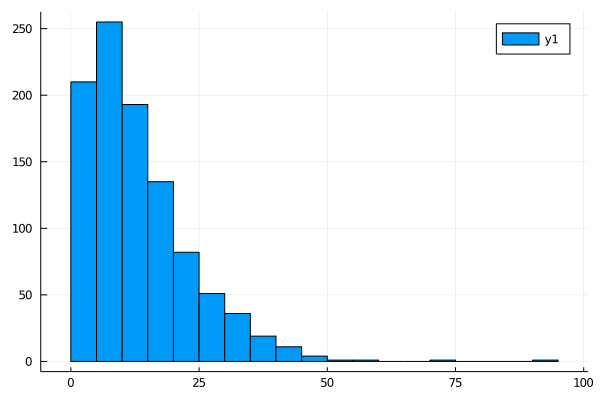

In [25]:
histogram_of_T(P)

### With $N>2$
$T_i$: expected time to reach $N$ if in state $i$ ($T_N=0$)
Bellman
$$
T_i = 1 + E(T_s)
$$
$$
T_i = 1 + \sum_{k=1}^N P_{ik}T_k
$$
$$
\mathbf T = \mathbf 1 + \mathbf P \mathbf T
$$
with $\mathbf T$ an $N\times 1$ vector. $T_n=0$

$$
\mathbf T_{-n} = \mathbf 1 + \mathbf P_{-n} 
\begin{pmatrix}
\mathbf T_{-n}\\
0
\end{pmatrix}
$$
with $\mathbf T_{-n}$ an $(N-1)\times 1$ vector. and $\mathbf P_{-n}$ is $(N-1)\times N$

$$
(\mathbf I - \mathbf P) \mathbf T = \mathbf 1	 
$$


In [40]:
function solve_T_with_Bellman(P::Array{Float64, 2})
    threshold = 0.00001
    N = size(P, 1)
    T = zeros(N)
    old_T = zeros(N)
    distance = 999 * threshold
    while distance > threshold
        T = 1 .+ P * old_T
        T[N] = 0
        distance = maximum(abs.(T .- old_T))
        old_T = T
    end
    return T
end

solve_T_with_Bellman (generic function with 1 method)

In [41]:
T = solve_T_with_Bellman(P)

3-element Array{Float64,1}:
 12.499917968670616
  4.999999999964165
  0.0

In [29]:
P

3×3 Array{Float64,2}:
  0.9   0.05   0.05
  0.0   0.8    0.2
 32.0  47.0   -3.0

### Coupon collector's problem
$K$ different types of coupons. Buy $N$ random ones so that we have at least 1 of each type. $E(N)=?$

With Bellman. State $k$: we already have $k$ different types of coupons. 

$N_k$: expected number of additional coupons to buy after this state.
$$
N_k = 0 
$$
for $k=K$
$$
N_k = 1 + \frac kK N_k+\frac{K-k}{K} N_{k+1}
$$